# Chapter 9: The Iterator Pattern

### By Ellen Considine
### 3/1/19

## Iterables and Iterators

In general: 

* An iterator is an object with a \_\_next\_\_ method and a \_\_done\_\_ method
* Defined by the abstract base class _Interator_
* Fulfills the _Iterable_ interface: provides an \_\_iter\_\_ method

Now here's a simple (and needlessly verbose) example...


In [1]:
class CapitalIterable:
    def __init__(self, string):
        self.string = string

    def __iter__(self):
        return CapitalIterator(self.string)
    
class CapitalIterator:
    def __init__(self, string):
        self.words = [w.capitalize() for w in string.split()]
        self.index = 0
    def __next__(self):
        if self.index == len(self.words):
            raise StopIteration()
        word = self.words[self.index]
        self.index += 1
        return word
    def __iter__(self):
        return self

In [2]:
iterable = CapitalIterable('the quick brown fox jumps over the lazy dog') #construct an iterable
iterator = iter(iterable) #retrieve an iterator
while True:
    try:
        print(next(iterator))
    except StopIteration:
        break

The
Quick
Brown
Fox
Jumps
Over
The
Lazy
Dog


Distinction:
* The iterable is an object with elements that can be looped over
* The iterator represents a specific location in the iterable

Simpler syntax (which we've probably all used) for constructing an iterator from an iterable: use the _for_ statement. ("... in spite of not looking terribly object-oriented, \[the for statement\] is actually a shortcut to some obviously object-oriented design principles.")

In [3]:
for i in iterable:
    print(i)

The
Quick
Brown
Fox
Jumps
Over
The
Lazy
Dog


## Comprehensions

__Comprehensions__ are a more concise and optimized syntax which allow us to efficiently transform or filter an iterable oject. The resultant object can be a:
* list
* set
* dictionary
* generator expression

__List comprehensions__ are one of the most powerful yet trivial tools in Python...

In [10]:
#Without list comprehension:
input_strings = ['1', '5', '28', '131', '3']

output_integers = []
for num in input_strings:
    output_integers.append(int(num))
    
#With list comprehension:
input_strings = ['1', '5', '28', '131', '3']

output_integers = [int(num) for num in input_strings]
print(output_integers)

[1, 5, 28, 131, 3]


Note:
* Comprehensions are highly optimized C code
* List comprehensions are far faster than _for_ loops when looping over a huge number of items

We can also make list comprehensions more complex by adding in conditions...

In [9]:
output_ints = [int(n) for n in input_strings if len(n) < 3]
print(output_ints)

[1, 5, 28, 3]


Note: 

* Any iterable can be the input to a list comprehension
* Anything we can wrap in a _for_ loop can also be inside inside a comprehension
    * For example, text files are iterable

In [16]:
#Example -- won't actually run unless you make an emails.txt file
filename = "emails.txt"
with open(filename) as file:
    header = file.readline().strip().split('\t')
    contacts = [
        dict(
            zip(header, line.strip().split('\t'))
            ) for line in file
        ]
for contact in contacts:
    print("email: {email} -- {last}, {first}".format(
        **contact))
#Note: this code is hard to understand, read, and maintain
    #List comprehensions aren't always the best solution, depending on how easily you want people to be able to read your code

We can use a similar syntax with braces to create sets and dictionaries as well. We'll start with __set comprehensions__.

In [17]:
from collections import namedtuple

Book = namedtuple("Book", "author title genre")
books = [
    Book("Pratchett", "Nightwatch", "fantasy"),
    Book("Pratchett", "Thief Of Time", "fantasy"),
    Book("Le Guin", "The Dispossessed", "scifi"),
    Book("Le Guin", "A Wizard Of Earthsea", "fantasy"),
    Book("Turner", "The Thief", "fantasy"),
    Book("Phillips", "Preston Diamond", "western"),
    Book("Phillips", "Twice Upon A Time", "scifi"),
    ]
#set comprehension:
fantasy_authors = {
    b.author for b in books if b.genre == 'fantasy'}

print(fantasy_authors)

{'Le Guin', 'Pratchett', 'Turner'}


Note: list comprehension would not have removed duplicates.

For __dictionary comprehensions__, we use a colon:

In [19]:
#set comprehension (for comparison):
fantasy_authors = {
    b.author for b in books if b.genre == 'fantasy'}

#dictionary comprehension:
fantasy_titles = {
    b.title: b for b in books if b.genre == 'fantasy'}

print(fantasy_titles)

{'Nightwatch': Book(author='Pratchett', title='Nightwatch', genre='fantasy'), 'Thief Of Time': Book(author='Pratchett', title='Thief Of Time', genre='fantasy'), 'A Wizard Of Earthsea': Book(author='Le Guin', title='A Wizard Of Earthsea', genre='fantasy'), 'The Thief': Book(author='Turner', title='The Thief', genre='fantasy')}


## Generator Expressions

When processing one item at a time, we only need the current object stored in memory at any one moment. This cuts down on the memory we would otherwise waste by creating a container for all the objects. 

For large amounts of data, creating a list (comprehension) might overload RAM, but we saw before that _for_ loops aren't as efficient.

Generator expressions use the same sytnax as comprehensions, but they don't create a final container object. To create a generator expression, wrap the comprehension in () instead of \[\] or {}.


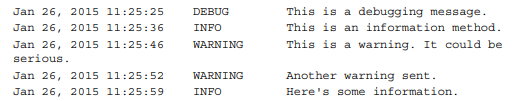

In [22]:
from IPython.display import Image
Image("C:\\Users\\ellen\\OneDrive\\MyDocs\\Earth Lab Internship\\General Coding\\log_example.PNG")

# Example: processing log files...

In [ ]:
# This code will print out lines from the log file that have "WARNING" in the second column
with open(inname) as infile:
    with open(outname, "w") as outfile:
        warnings = (l for l in infile if 'WARNING' in l) #generator expression
        for l in warnings:
            outfile.write(l)

Note:
* Generator expressions are frequently most useful inside function calls
    * For example: call sum, min, max on a generator expression instead of a list
* In general, use a generator expression whenever possible
    * If we simply need to filter or convert items in a sequence, a generator expression will be most efficient
    * If we need to know the length of a list, sort the result, remove duplicates, or create a dictionary, we'll have to use the comprehension syntax

If we wanted to delete the "WARNING" column from our output file, we have several options, with various levels of readability.

In [ ]:
#Using a generator expression:
with open(inname) as infile:
    with open(outname, "w") as outfile:
        warnings = (l.replace('\tWARNING', '')
            for l in infile if 'WARNING' in l)
        for l in warnings:
            outfile.write(l)
#Using a for loop:
with open(inname) as infile:
    with open(outname, "w") as outfile:
        for l in infile:
            if 'WARNING' in l:
                outfile.write(l.replace('\tWARNING', ''))

In [ ]:
#Truly object-oriented, but ugly and difficult to read:
class WarningFilter:
    def __init__(self, insequence):
        self.insequence = insequence
    def __iter__(self):
        return self
    def __next__(self):
        l = self.insequence.readline()
        while l and 'WARNING' not in l:
            l = self.insequence.readline()
        if not l:
            raise StopIteration
        return l.replace('\tWARNING', '')
    
    with open(inname) as infile:
        with open(outname, "w") as outfile:
            filter = WarningFilter(infile)
            for l in filter:
                outfile.write(l)

This code does exactly the same thing as the previous (class) code: it creates an object with a \_\_next\_\_ method that raises _StopIteration_ when it's out of inputs.

In [ ]:
def warnings_filter(insequence):
    for l in insequence:
        if 'WARNING' in l:
            yield l.replace('\tWARNING', '') #only yields lines that contain "WARNING"
        
with open(inname) as infile:
    with open(outname, "w") as outfile:
        filter = warnings_filter(infile)
        for l in filter:
            outfile.write(l)


In [23]:
def warnings_filter(insequence):
    for l in insequence:
        if 'WARNING' in l:
            yield l.replace('\tWARNING', '') #only yields lines that contain "WARNING"

* __yield__ is the key to generators
* Similar to the __return__ statement, except when it exits the function and the function is called again (via next()), it will start where it left off -- on the line after the __yield__ statement -- instead of at the beginning of the function.
    * In the code above, there is no line "after" the __yield__, so it jumps to the next iteration of the _for_ loop. 
* This function creates a generator object (see below)


In [24]:
 print(warnings_filter([]))

<generator object warnings_filter at 0x0000014ABFC56150>


Note:
* Generators aren't that advanced, but it helps to remember that the function is creating an object
* You can get powerful effects by making multiple calls to __yield__ in a single function
    * The generator will pick up the most recent __yield__ and continue to the next one

Often, when we build a generator function, we end up in a situation where we want to yield data from another iterable object, such as:
* a list comprehension or generator expression we constructed inside the generator
* external items that were passed into the function, such as a filename


In [ ]:
def warnings_filter(infilename): 
    with open(infilename) as infile: #Author made a remark about proper Python coding means trying to keep functions as general 
        # as possible -- so not hard-coding in the use of a filename, rather than memory or a web-based aggregator...
        yield from (
            l.replace('\tWARNING', '') #transformation
            for l in infile #loop
            if 'WARNING' in l #filter
        )
        
filter = warnings_filter(inname)
with open(outname, "w") as outfile:
    for l in filter:
        outfile.write(l)

This still isn't that easy to read...

More readable: construct a generator that yields data from multiple other generators.

For example: the __itertools.chain__ function yields data from iterables in sequences until they have all been exhausted.

This is implemented easily using the __yield from__ syntax...

In [25]:
# Example: walking a general tree (Unix filesystem)

#setup:
class File:
    def __init__(self, name):
        self.name = name     
class Folder(File):
    def __init__(self, name):
        super().__init__(name)
        self.children = []
root = Folder('')
etc = Folder('etc')
root.children.append(etc)
etc.children.append(File('passwd'))
etc.children.append(File('groups'))
httpd = Folder('httpd')
etc.children.append(httpd)
httpd.children.append(File('http.conf'))
var = Folder('var')
root.children.append(var)
log = Folder('log')
var.children.append(log)
log.children.append(File('messages'))
log.children.append(File('kernel'))

The setup was a bit of work, but once in memory, the code that outputs every file in the filesystem is quite elegant:

In [31]:
def walk(file):
    if isinstance(file, Folder): #if directory, recursively generate a list of all files subordinate to each of its children
        # then yeilds all that data its own filename
        yield file.name + '/'
        for f in file.children:
            yield from walk(f)
    else:
        yield file.name

# Let's talk about this:
walk('root')

<generator object walk at 0x0000014ABFCA7780>

## Coroutines
In addition to being a useful shortcut when writing chained generators, the __yield from__ syntax is more commonly used for piping data through coroutines. 

__*Coroutines*__ are extremely powerful constructs that are often confused with generators.

Note: coroutines are pretty hard to understand, and not used that often in the wild. 

One confusing fact: when you create a coroutine in Python, the object returned is a generator.

In [33]:
#Simple coroutine:
def tally():
    score = 0
    while True:
        increment = yield score
        score += increment

blue = tally()
print(next(blue))
print(blue.send(2))
print(blue.send(3))

0
2
5


__send__ does exactly the same thing as __next__, except in addition to advancing the generator to the next __yield__ statement, it allows you to pass in a value from outside the generator. 

Order:
* __yield__ occurs and the generator pauses
* __send()__ occurs from outside the function and the generator wakes up
* the value sent in is assigned to the left side of the __yield__ statement
* the generator continues processing until it encounters another __yield__ statement

Note: __send()__ both submits a value to the generator and returns the value from the upcoming __yield__ statement, just like __next()__. 

*Thus: a generator only produces values, while a coroutine can also consume them.*

In [35]:
import re
def match_regex(filename, regex): #search for the next important line in the file
    with open(filename) as file:
        lines = file.readlines()
    for line in reversed(lines):
        match = re.match(regex, line)
        if match:
            regex = yield match.groups()[0] #this yield with assignment syntax makes match_regex a coroutine
def get_serials(filename): #decide which line is important
    ERROR_RE = 'XFS ERROR (\[sd[a-z]\])'
    matcher = match_regex(filename, ERROR_RE)
    device = next(matcher)
    while True:
        bus = matcher.send('(sd \S+) {}.*'.format(re.escape(device)))
        serial = matcher.send('{} \(SERIAL=([^)]*)\)'.format(bus))
        yield serial #yields to the outside for loop (print statement); this yield syntax makes get_serial a generator
        device = matcher.send(ERROR_RE)

# for serial_number in get_serials('EXAMPLE_LOG.log'):
#     print(serial_number)

### Closing coroutines and throwing exceptions

Generators:
* Normally signal their exit from inside by raising _StopIteration_
* Propagate _StopIteration_ outwards when we chain multiple generators together
    * Eventually hit a _for_ loop that will see the exception and know it's time to exit the loop
    
...

... Coroutines:
* Don't normally follow the iteration mechanism
* Entity pushing data through (using __send()__) is normally in charge of telling the coroutine when it's finished
    * It does this by calling the __close()__ method on the coroutine in question
        * Raises a _GeneratorExit_ exception at the point the coroutine was waiting for a value to be sent in.
    * Normally good policy for coroutines to wrap their __yield__ statements in a __try...finally__ block 
        * Perform cleanup tasks (e.g., closing associated files)
* Can use __throw()__ inside a coroutine to cause a chain of exceptions (with traceback) 

## Coroutines, Generators, and Functions

* In Python, the distinction between coroutines and generators is blurry. 
    * All coroutines are generator objects; many authors use the terms interchangeably.
* In CS at large, generators are considered a specific type of coroutine.
* A coroutine is a routine that can have data passed in at one or more points and get it out at one or more points.
    * In Python, the point where data is passed in or out is the __yield__ statement.


* A function, or subroutine, is the simplest type of coroutine.
* A generator is a type of coroutine that can have data passed in at one point, but can pass data out at multiple points.
* In Python, both generators and coroutines are constructed using syntax that looks like we are constructing a function, but we're actually constructing a totally different kind of object.


In summary:
    
* Functions are callable and have return values
* Generators have data pulled out using __next()__
* Coroutines have data pushed in using __send()__

Case Study (pages 291 - 298)...